## Анализ датасета

датасет содержит данные по самым популярным песням на spotify в 2024 году

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
import seaborn as sns
from itertools import *
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('Top Hits Spotify from 2000-2019.csv', encoding='latin1')

df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

меня интересуют данные только по spotify, поэтому удаляю "лишние" данные

In [4]:
df = df.drop(['key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'], axis = 1)

In [5]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,pop


основные числовые показатели в данном датасете:


*   year - год релиза песни
*   duration_ms - длительность песни
*   Popularity - рейтинг популярности песни
*   danceability - показатель от 0,0 до 1,0, описывающий, насколько трек подходит для танцев, на основе некоторых музыкальных элементов
*  	energy - показатель от 0,0 до 1,0, отражающий интенсивность и уровень активности трека




In [6]:
df.describe()

,duration_ms,year,popularity,danceability,energy
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366
std,39136.569008,5.85996,21.335577,0.140416,0.152745
min,113000.000000,1998.00000,0.000000,0.129000,0.054900
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000
max,484146.000000,2020.00000,89.000000,0.975000,0.999000


Средняя оценка популярности трека - **59,9**.
Это значение близко к значению 25% квантиля, представляющего собой медиану выборки. Скорее всего, нормального распределения выборки будет.
То же самое мы можем сказать о показателях danceability	и energy.

# Проверка рейтинга на нормальное распределение
Визуальный анализ (гистограммы)

Построим гистограммы интересующих нас признаков, а также наложим поверх гистограм то, как бы выглядело нормальное распределение с параметрами, рассчитанными на основе выборок.


какие выводы мы можем сделать?
нормальное распределение прослеживается во всех выборках.
но видно, что на гистограмме популярности есть еще выброс в начале графика, что делает распределение не нормальным

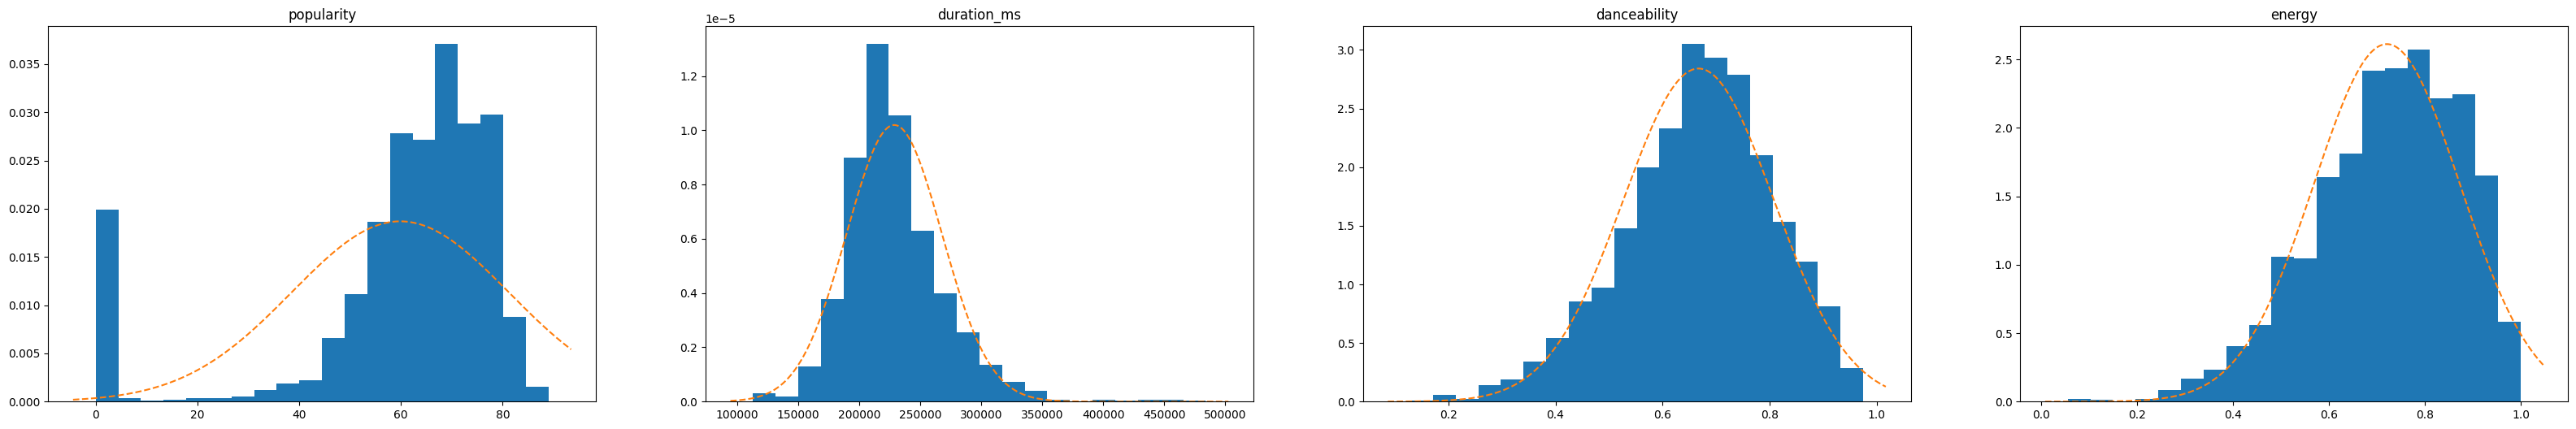

In [7]:
keys = ['popularity',	'duration_ms', 'danceability',	'energy']

fig, axes = plt.subplots(ncols = len(keys))
fig.set_size_inches(10 * len(keys), 6)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density = True, bins = 20)

    loc = df[key].mean()
    scale = df[key].std()

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc = loc, scale = scale)

    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

# Визуальный анализ (квантили)

Построим Q-Q кривую. Это график, который показывает соответствие между теоретическим значением квантиля на выборке и его реальным значением.

Чем ближке график к графику y = x, тем более нормальным является распределение значений выборки.

Все показатели, кроме популярности, приближенно распределены нормально.


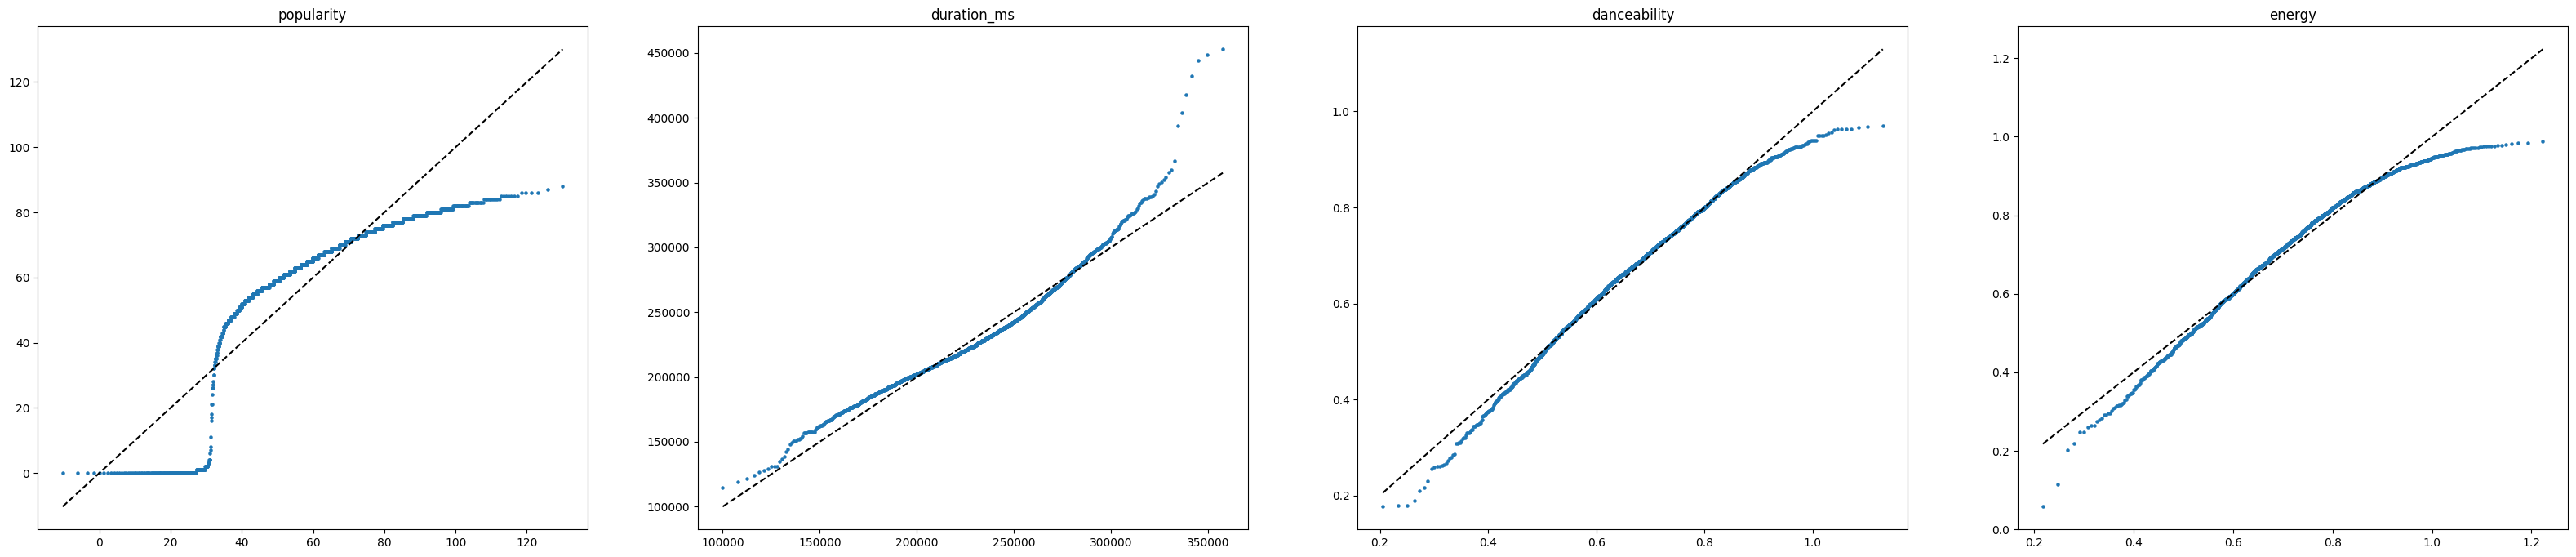

In [21]:
fig, axes = plt.subplots(ncols = len(keys))
fig.set_size_inches(10 * len(keys), 8)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s = 5)
    ax.plot(x, x, color = 'k', linestyle = '--')

    ax.set_title(key)

Даже просто по подсчету цензурных и нецензурных песен, можно сделать вывод, что в чарты попадают больше нецензурные песни

In [9]:
explicity = df['explicit'].value_counts()

explicity

,count
explicit,
False,1449
True,551


# Визуализация зависимости

Визуализировав зависимость, мы видим неявную связь между длительностью и оценкой.
многие популярные песни длятся от 200000 до 250000 милисекунд...

глубо говоря, можно просто заметить, что больше всего песен имеют длительность в упомянутом интервале.

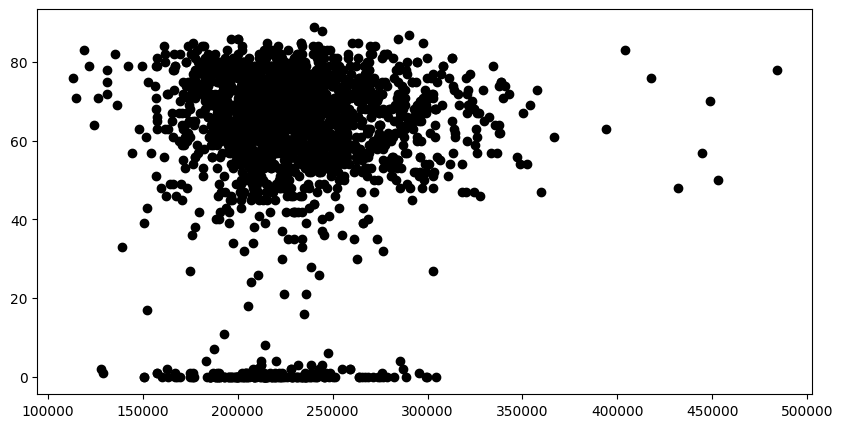

In [22]:
plt.figure(figsize = (10, 5))
plt.scatter(df['duration_ms'], df['popularity'], color = 'k')
plt.show()

Теперь визуализируем зависимость danceability и energy.

тут есть небольшая зависимость, но не явная

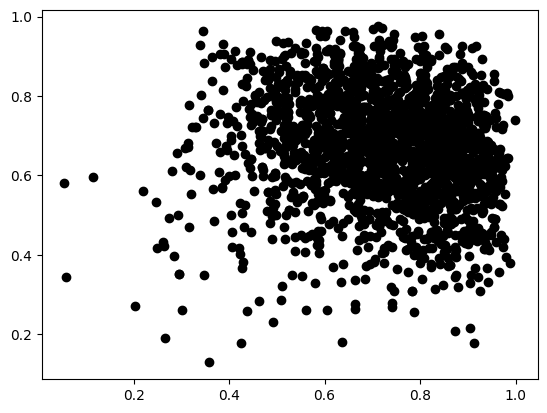

In [18]:
b1 = np.cov(df['danceability'], df['energy'], ddof=1)[0, 1] / np.var(df['danceability'], ddof=1)
b0 = df['energy'].mean() - b1 * df['danceability'].mean()


plt.scatter(df['energy'], df['danceability'], color = 'k')
#x = np.linspace(0, 1, 100)
#y = b0*x + b1
#plt.plot(x, y, color = 'r')
plt.show()

In [12]:
df.corr(numeric_only = True)

,duration_ms,explicit,year,popularity,danceability,energy
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038
energy,-0.078763,-0.162462,-0.108644,-0.014021,-0.104038,1.000000


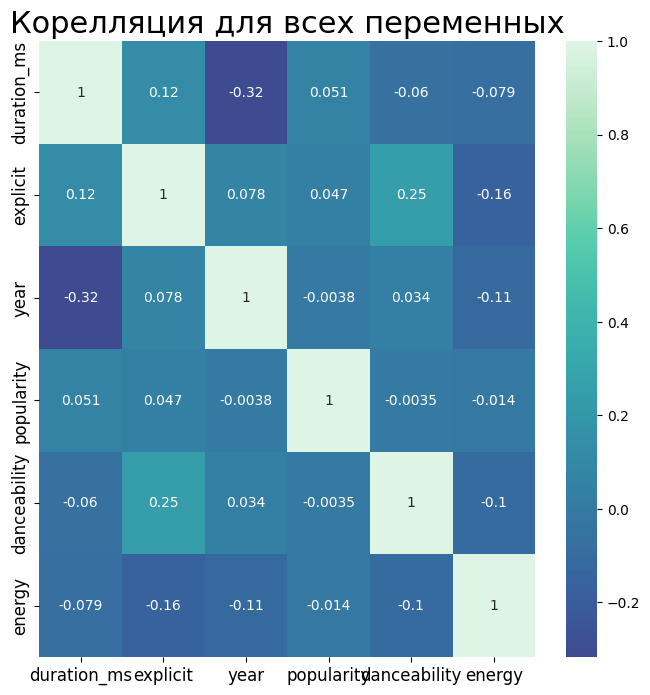

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only = True), xticklabels = df.corr(numeric_only = True).columns, yticklabels = df.corr(numeric_only = True).columns, cmap = 'mako', center = 0, annot=True)

plt.title('Корелляция для всех переменных', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Для датасета Top Hits Spotify from 2000-2019 можно сформулировать следующие гипотезы для анализа:


**1. Гипотеза о влиянии танцевальности на популярность**

Параметр "танцевальность" влияет на популярность песни. Из графика видно, что наибольшую популярность имеют большинство песен с высоким показателем танцевальности.



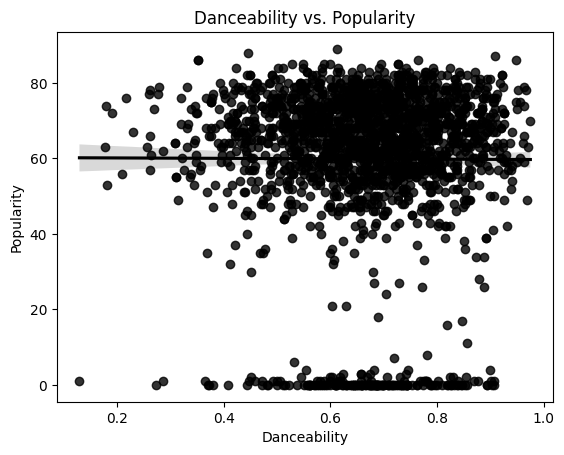

In [17]:
# Корреляция между танцевальностью и популярностью
danceability = df['danceability']
popularity = df['popularity']

# Визуализация зависимости
sns.regplot(x = danceability, y = popularity, color = 'k')
plt.title('Danceability vs. Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()


2. **Гипотеза о связи между энергией трека и его популярностью**

 График указывает на то, что зависимости из предыдущей гипотезы и данной очень схожи. большинство энергичных песен являются популярными.

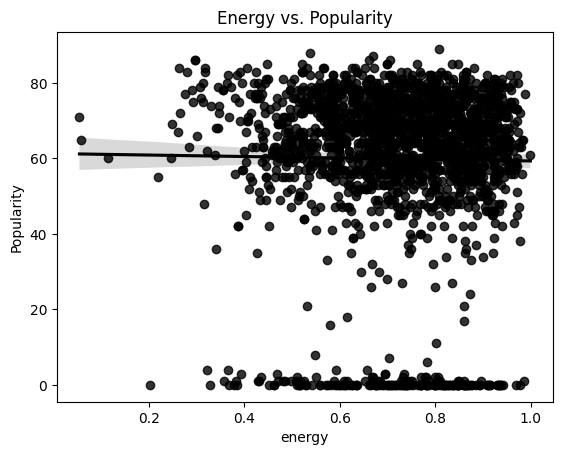

In [23]:
# Корреляция между танцевальностью и популярностью
energy = df['energy']
popularity = df['popularity']

# Визуализация зависимости
sns.regplot(x = energy, y = popularity, color = 'k')
plt.title('Energy vs. Popularity')
plt.xlabel('energy')
plt.ylabel('Popularity')
plt.show()


3.  **Гипотеза о различиях в популярности песен с "explicit" контентом**

Делаем вывод из графика, что песни с явным контентом ("explicit") не отличаются по популярности от песен без явного контента.




T-Statistic: 2.0855, P-value: 0.0372


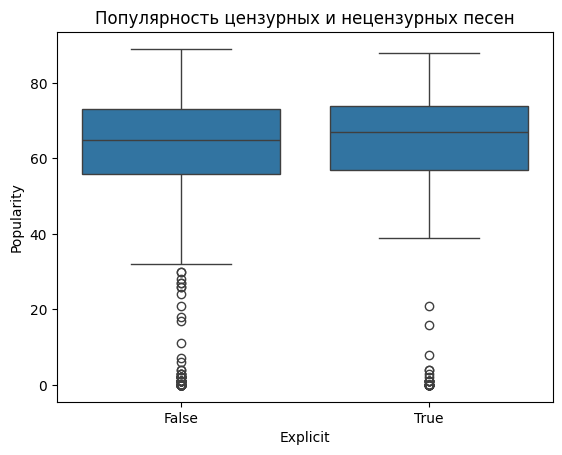

In [24]:
from scipy.stats import ttest_ind

explicit = df[df['explicit'] == 1]['popularity']
non_explicit = df[df['explicit'] == 0]['popularity']

t_stat, p_value = ttest_ind(explicit, non_explicit)
print(f'T-Statistic: {t_stat:.4f}, P-value: {p_value:.4f}')

sns.boxplot(x='explicit', y='popularity', data=df)
plt.title('Популярность цензурных и нецензурных песен')
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.show()


4.  **Гипотеза о влиянии жанров на популярность**

Проведём анализ зависимости оценки от качественного фактора "жанр". Для этого разобъём нашу таблицу на дамми переменные по жанрам. Построим ради матрицу корелляции.

Затем проведём дисперсиоанный анализ для всех пар выборок и построим график разброса результата.

Можно однозначно сказать, что в большинстве случае жанр не влияет на оценку, и в меньшестве случаев жанр статистически на оценку влияет.

In [49]:
df['genre'] = df['genre'].str.strip()
seperated_genres = df['genre'].str.get_dummies(', ')
dataset_with_genres = pd.concat([df, seperated_genres], axis = 1, sort = False)

seperated_genres

,Dance/Electronic,Folk/Acoustic,R&B,World/Traditional,blues,classical,country,easy listening,hip hop,jazz,latin,metal,pop,rock,set()
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1996,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1997,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


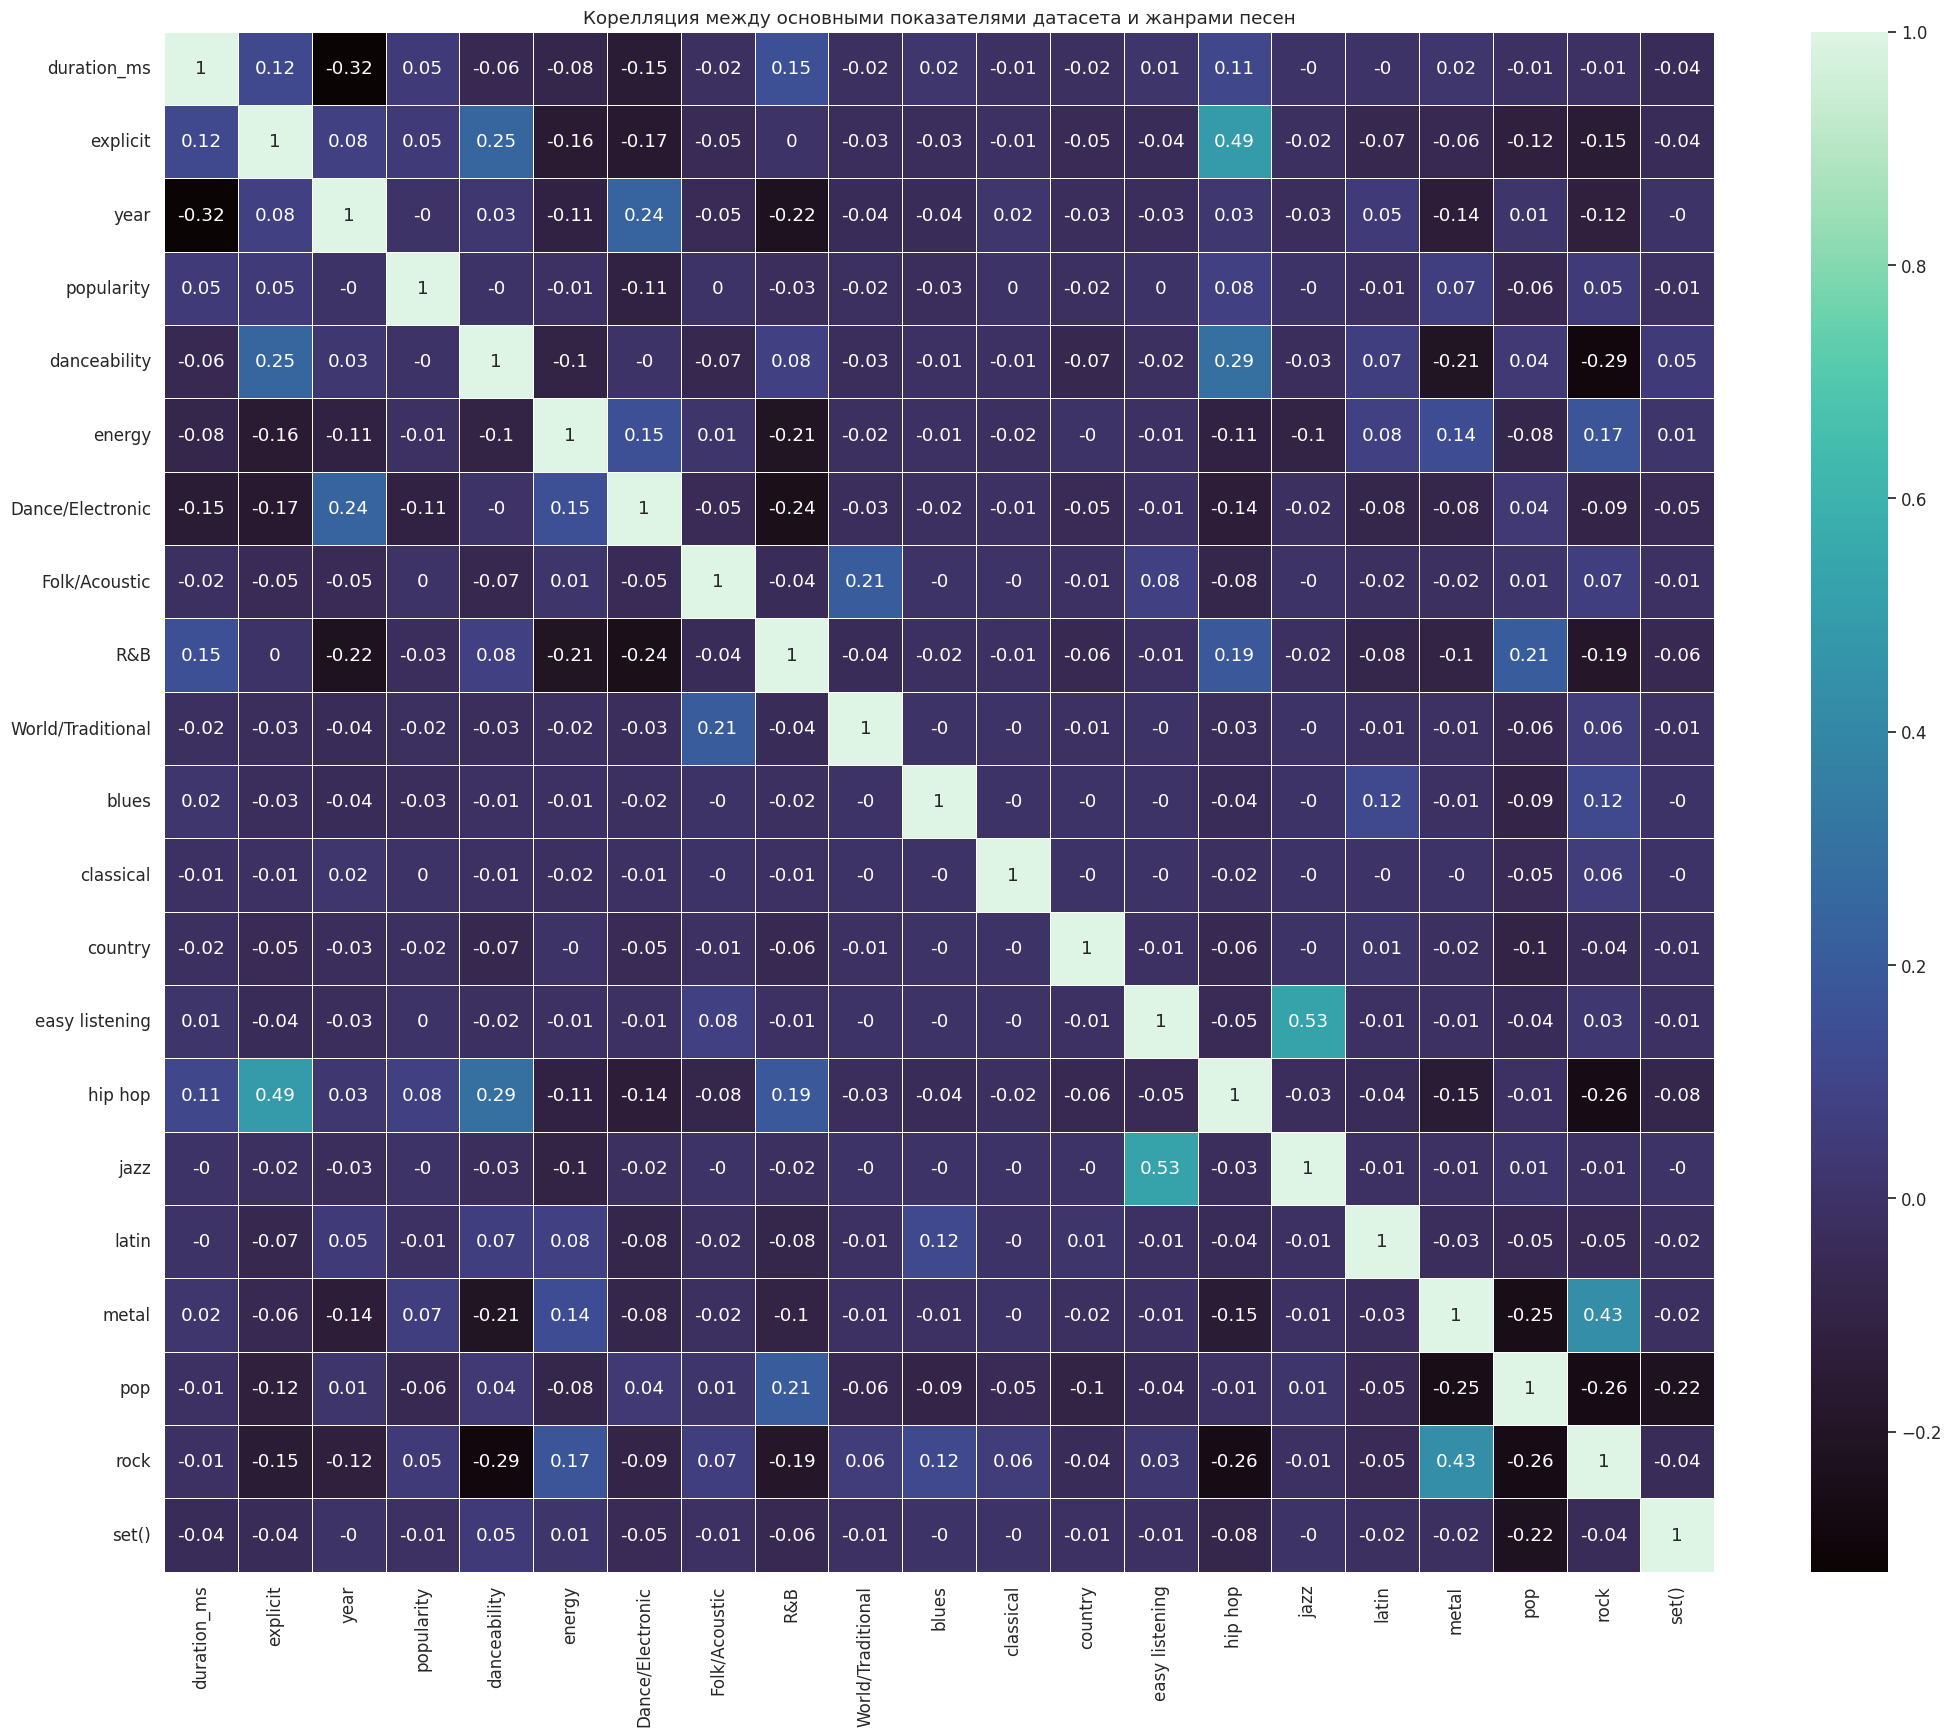

In [50]:
seperated_genres = df['genre'].str.get_dummies(', ')
dataset_with_genres = pd.concat([df, seperated_genres], axis = 1, sort = False)

list_of_genres = seperated_genres.columns

plt.figure(figsize = (25,20))

sns.set(font_scale=1.1)

corr_matrix = dataset_with_genres.corr(numeric_only = True)
corr_matrix = np.round(corr_matrix, 2)
#corr_matrix[np.abs(corr_matrix) < 0.3] = 0  # Отсекаем маленьеи корелляции

sns.heatmap(corr_matrix, annot = True, linewidths = .5, cmap='mako')

plt.title('Корелляция между основными показателями датасета и жанрами песен')
plt.show()

In [51]:
#анализ дисперсии (ANOVA) для сравнения популярности различных музыкальных жанров.

def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.05
#Используется распределение Фишера для определения критического значения F при заданном уровне значимости (alpha = 0.05).
  t = stats.f.ppf(1 - alpha, k1, k2)
#Возвращается результат проверки гипотезы: если F больше критического значения, то возвращается True, иначе False.
  return F>t


list_of_res = []
for i in combinations(list_of_genres, 2):
  #print(i)
  dict = {}
  dict['g1'] = i[0]
  dict['g2'] = i[1]
  wdf = dataset_with_genres[[i[0], i[1], 'popularity']]
  wdf = wdf.loc[ (wdf[i[0]]==1) | (wdf[i[1]]==1) ]
  wdf1 = wdf[wdf[i[0]]==1]
  wdf2 = wdf[wdf[i[1]]==1]

  dict['va'] = var_analise(wdf, wdf1, wdf2, 'popularity')
  dict['g1_mean'] = wdf1['popularity'].mean()
  dict['g2_mean'] = wdf2['popularity'].mean()
  list_of_res.append(dict)


resframe3 = pd.DataFrame(list_of_res)
resframe3[resframe3['va'] == False]


,g1,g2,va,g1_mean,g2_mean
0,Dance/Electronic,Folk/Acoustic,False,54.982051,60.200000
2,Dance/Electronic,World/Traditional,False,54.982051,53.800000
3,Dance/Electronic,blues,False,54.982051,45.500000
4,Dance/Electronic,classical,False,54.982051,63.000000
5,Dance/Electronic,country,False,54.982051,56.571429
...,...,...,...,...,...
96,latin,pop,False,59.171875,59.274342
97,latin,rock,False,59.171875,63.068376
98,latin,set(),False,59.171875,57.454545
103,pop,set(),False,59.274342,57.454545


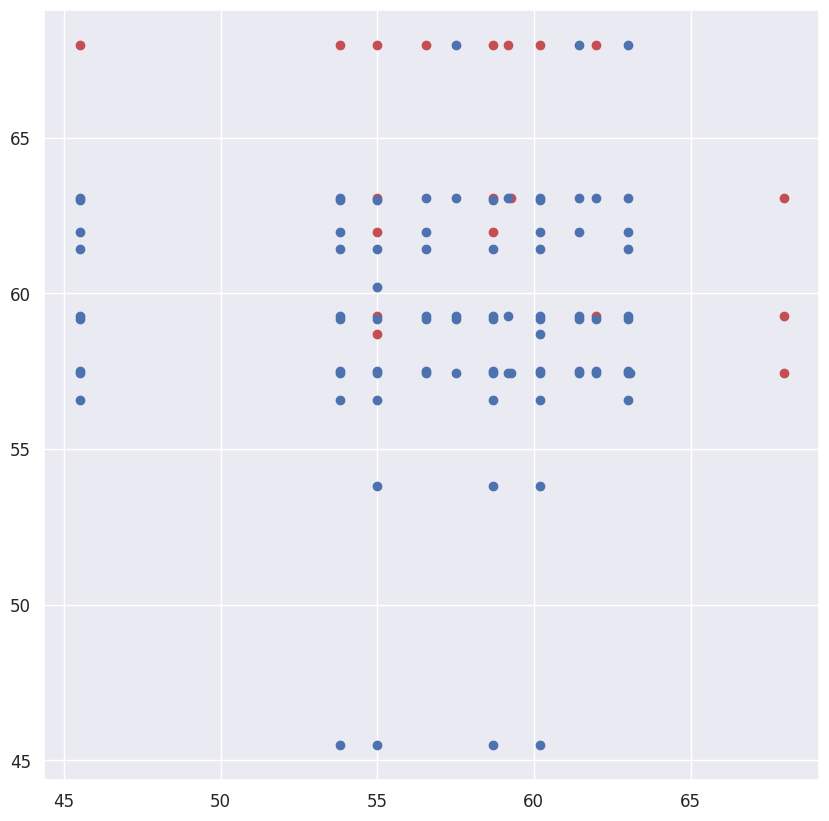

In [52]:
plt.figure(figsize = (10,10))

plt.scatter(resframe3.loc[resframe3['va'] == True, 'g1_mean'], resframe3.loc[resframe3['va'] == True, 'g2_mean'], color = 'r')
plt.scatter(resframe3.loc[resframe3['va'] == False, 'g1_mean'], resframe3.loc[resframe3['va'] == False, 'g2_mean'], color = 'b')

5. **Гипотеза о влиянии года выпуска на популярность**

Год выпуска песни не оказывает влияния на её популярность. В каждом году были и популярные и непопулярные песни


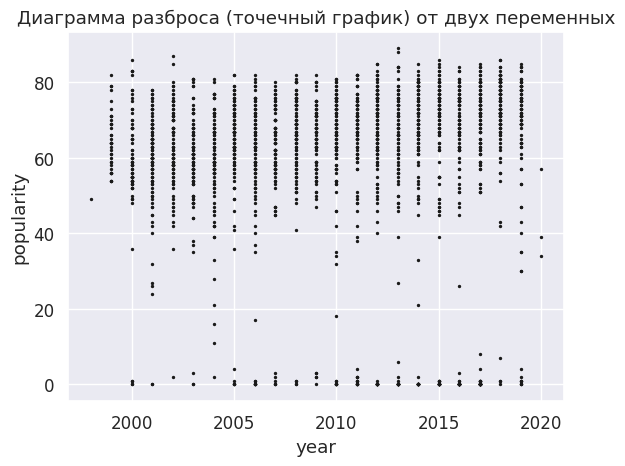

In [ ]:
fig, ax = plt.subplots()
x = df['year']
y = df['popularity']

ax.scatter(x, y, c = 'k', s = 2)
ax.set_xlabel('year')
ax.set_ylabel('popularity')
ax.set_title('Диаграмма разброса (точечный график) от двух переменных')


plt.show()

Самые популярные песни

In [ ]:
top_songs = df[['artist', 'song', 'popularity']].sort_values(by='popularity', ascending=False)

top_songs.head(10)

,artist,song,popularity
1322,The Neighbourhood,Sweater Weather,89
1311,Tom Odell,Another Love,88
201,Eminem,Without Me,87
1613,WILLOW,Wait a Minute!,86
6,Eminem,The Real Slim Shady,86
1929,Billie Eilish,lovely (with Khalid),86
1819,Billie Eilish,lovely (with Khalid),86
1512,The Neighbourhood,Daddy Issues,85
1709,Ed Sheeran,Perfect,85
1999,Post Malone,Circles,85


## ВЫВОД

Проанализирова данный датасет, можно сделать такие заключения:
1. Популярность неявно зависит от показателей танцевальности и энергичности
2. Популярность не зависит от года релиза и проявляется слабая связь с длительностью
3. Популярность песен не зависит от жанра
4. В топы попадает больше нецензурных песен, но популярность песни никак от этого не зависит
5. Все численные показатели песен (кроме популярности) имеют нормальное распределение
6. Танцевальность и энергичность связаны тем, что чем энергичнее песня, тем она танцевальнее

Таким образом, можно сказать, что нельзя вывести определенные закономерности в датасете по топ хитам 2000-2019 годов. и это логично, потому что музыка - слишком субъективная вещь, которая редко поддается под статистические правила.

И самая интересная часть) Моя самая любимая песня является самой популярной в данной выборке.